**Heston Model**

The Heston Model models the volatility of the asset as a stochastic process. The price of the asset is given by

\begin{align}
dS_t & = \mu S_t dt + \sqrt{V_t} S_t dW_t^S \\[0.5ex]
dV_t &= \alpha(b-V_t)dt + \sigma \sqrt{V_t} dW_t^V 
\end{align}

and the correlation between the two Brownian motion is given by

\begin{equation}
dW_t^S dW_t^V = \rho \, dt.
\end{equation}



In [19]:
# ========================== Heston Model ===========================
# Author: Alexis D. Plascencia
# We implement the stochastic Heston Model for stock pricing
# =====================================================================

import numpy as np
import matplotlib.pylab as plt
import scipy.stats as ss
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot
from random import randint

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
# General input parameters:
steps = 500
ti = 0.0
tf = 100.0
dt = (tf-ti)/steps
time = np.linspace(ti, tf, steps+1)

In [3]:
def Heston(paths, alpha, b, rho, mu, sigma, v0, s0):
    
    """Simulates Stock prices using the Heston Model

    Argumentss:
        paths: The number of paths that will be generated
        alpha: Speed of reversion
        b: Long-term variance mean level
        rho: Correlation betwen Brownian motions
        mu: Drift of stock price
        sigma: Standard deviation of the standard deviation
        v0: Initial condition for volatility
        s0: Initial condition for the stock price

    Returns:
        vol: the volatility at each point in time.
        S: the stock price at each point in time.
    """

    # We generate the two corelated Brownian motions 
    means = np.array([0, 0])
    covs = np.matrix([[1, rho], [rho, 1]])
    W = ss.multivariate_normal.rvs( mean=means, cov=covs, size=(paths,steps) )

    W_S = W[:,:,0]   # Stock Brownian motion    
    W_V = W[:,:,1]   # Variance Brownian motion

    # We initialize the vectors
    vol = np.zeros((paths,steps+1))
    S = np.zeros((paths,steps+1))
    
    # We set the initial conditions
    vol[:,0] = v0
    S[:,0] = s0
    
    for i in range(steps):
        vol[:,i+1] = vol[:,i] + alpha*(b-vol[:,i])*dt + sigma*np.sqrt(vol[:,i])*np.sqrt(dt)*W_V[:,i]
        S[:,i+1] = S[:,i] + mu*dt*S[:,i] + np.sqrt(vol[:,i])*np.sqrt(dt)*W_S[:,i]*S[:,i] 
    
    # We return the volatility and the stock price as a function of time
    return vol, S

In [4]:
# Input Parameters:
paths = 20                              
alpha = 0.2                             
b = 0.04                               
rho = 0.#-0.7                              
mu = 0.01                               
sigma = 0.02                            
v0 = 0.1                                
s0 = 100.0                              

if 2*alpha*b>sigma**2.:
    print("Feller condition is satisfied")
else:
    print("Feller condition is NOT satisfied")


Feller condition is satisfied


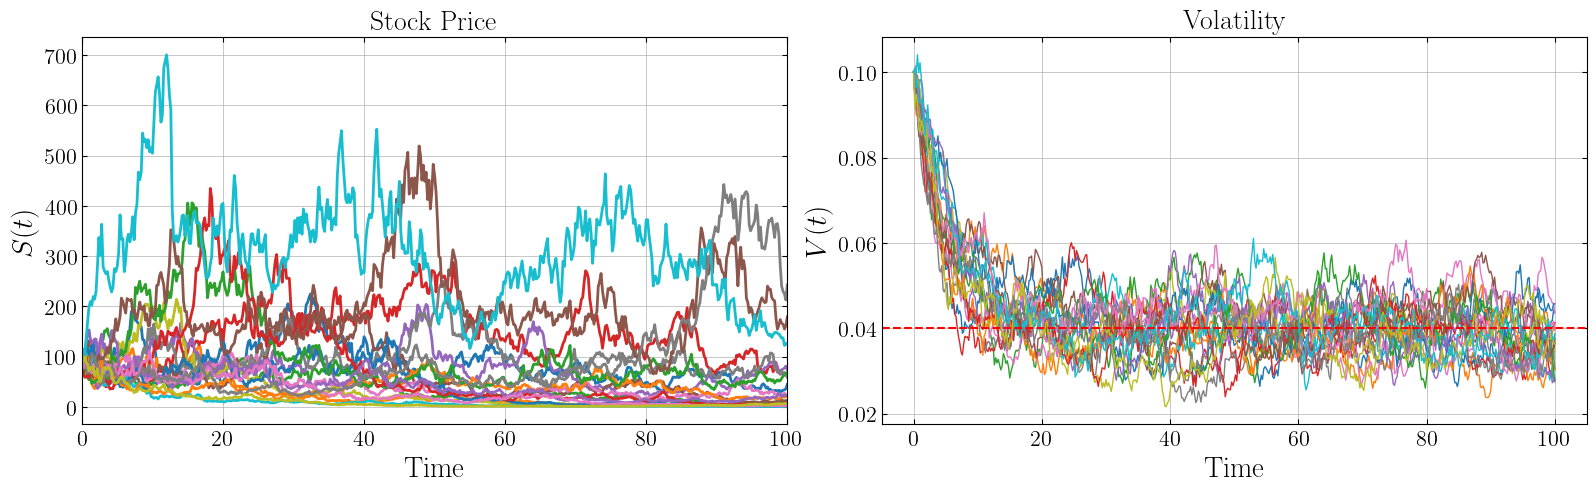

In [16]:
# We generate different examples with the same input parameters
vol, S = Heston(paths, alpha, b, rho, mu, sigma, v0, s0)    
    
fig = plt.figure(figsize=(16,5)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
    
ax1.set_title(r'${\rm Stock\,\, Price}$', fontsize=20, color='black')   
ax2.set_title(r'${\rm Volatility}$', fontsize=20, color='black')       

lwS = 2.
for i in range(paths): #range(2):#range(paths):
    ax1.plot(time, S[i,:], linewidth=lwS)

lwV = 1. 
for i in range(paths): #range(2):#range(paths):   
    ax2.plot(time, vol[i,:], linewidth=lwV)
    
ax1.set_xlabel(r'${\rm Time}$', fontsize=21)
ax2.set_xlabel(r'${\rm Time}$', fontsize=21)
#ax.set_xscale("log")
ax1.set_xlim(min(time), max(time))

ax1.set_ylabel(r'$S(t)$', fontsize=21)
ax2.set_ylabel(r'$V(t)$', fontsize=21)
#ax.set_yscale("log")
#ax.set_ylim(-.2, .2) 

#ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
#ax.xaxis.set_major_locator(plt.MultipleLocator(200))
    
plt.tight_layout()
    
# This is needed for to show ticks on four frams in the latest version of matplotlib
ax1.tick_params(axis='both', which='both', direction='in')
ax2.tick_params(axis='both', which='both', direction='in')
ax1.xaxis.set_ticks_position('both'); ax1.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both'); ax2.yaxis.set_ticks_position('both')
ax2.axhline(b, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
    
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
   
ax1.grid(linewidth=0.5)
ax2.grid(linewidth=0.5)
   
plt.show()
fig.savefig('plots.png')
#fig.savefig('plots.pdf', format='pdf')     

We calculate and plot the Moving Average and the Rolling Standard Deviation for different time windows.  

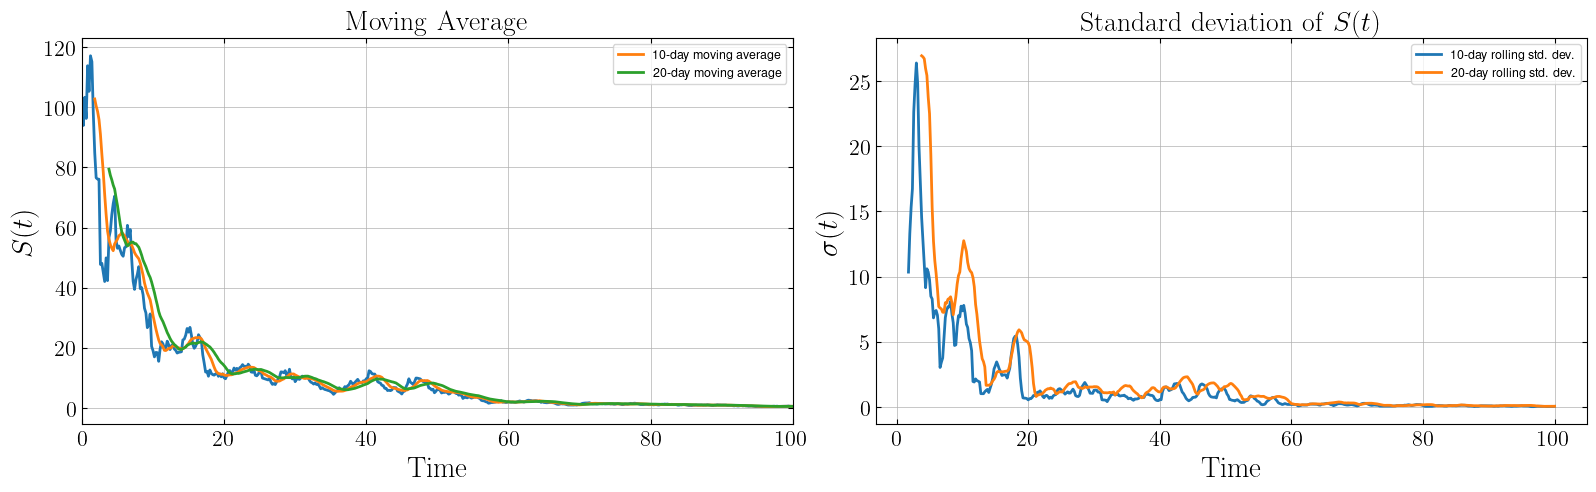

In [48]:
# We select a random path from the ones generated above
rand_max = S.shape[0]
path_index = randint(0,rand_max-1)
ts = pd.Series(S[path_index,:])

# Take a rolling standard deviation over a window
window_1 = 10
window_2 = 20
ts_mean_1 = ts.rolling(window_1).mean()
ts_mean_2 = ts.rolling(window_2).mean()
ts_std_1 = ts.rolling(window_1).std()
ts_std_2 = ts.rolling(window_2).std()

fig = plt.figure(figsize=(16,5)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
    
ax1.set_title(r'${\rm Moving\,\, Average}$', fontsize=20, color='black')   
ax2.set_title(r'${\rm Standard \,\, deviation \,\, of \,\,} S(t) $', fontsize=20, color='black')       

lwS = 2.
ax1.plot(time, ts, linewidth=lwS)
ax1.plot(time, ts_mean_1, linewidth=lwS, label='10-day moving average')
ax1.plot(time, ts_mean_2, linewidth=lwS, label='20-day moving average')

lwV = 2. 
ax2.plot(time, ts_std_1, linewidth=lwV, label='10-day rolling std. dev.')
ax2.plot(time, ts_std_2, linewidth=lwV, label='20-day rolling std. dev.')
    
ax1.set_xlabel(r'${\rm Time}$', fontsize=21)
ax2.set_xlabel(r'${\rm Time}$', fontsize=21)
ax1.set_xlim(min(time), max(time))

ax1.set_ylabel(r'$S(t)$', fontsize=21)
ax2.set_ylabel(r'$\sigma(t)$', fontsize=21)
    
plt.tight_layout()

# Now add the legend with some customizations.
ax1.legend(prop={'size':9})
ax2.legend(prop={'size':9})
    
# This is needed for to show ticks on four frams in the latest version of matplotlib
ax1.tick_params(axis='both', which='both', direction='in')
ax2.tick_params(axis='both', which='both', direction='in')
ax1.xaxis.set_ticks_position('both'); ax1.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both'); ax2.yaxis.set_ticks_position('both')
    
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
   
ax1.grid(linewidth=0.5)
ax2.grid(linewidth=0.5)
   
plt.show()
fig.savefig('plots.png')
#fig.savefig('plots.pdf', format='pdf')     


As a final note, the Cox-Ingersoll-Ross model for interest rates has the same equation as the volatility in this model. The former is used when interest rates are expected to be always positive

$$ dr = \alpha(b-r)dt + \sigma \sqrt{r} dW_t. $$

